# Identifying no. of Clusters - Unspervised Learning

### Iris Dataset

The Sparks Foundation - Internship (Data Science & Business Analytics)

-> Predict the optinum number of clusters and represent visually.

In [88]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
df = pd.DataFrame(pd.read_csv('Iris.csv'))

## Exploratory Data Analysis

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.drop(columns = 'Id', inplace = True) #remove redundant column

In [21]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [24]:
df.shape

(150, 5)

In [30]:
#scaling input features so that they are in the same range

scaler = MinMaxScaler()
feature_list = df.drop('Species',axis = 1).columns
scaled_data = scaler.fit_transform(df[feature_list])

x = pd.DataFrame(scaled_data, columns = feature_list) # new df
y = df.Species

x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


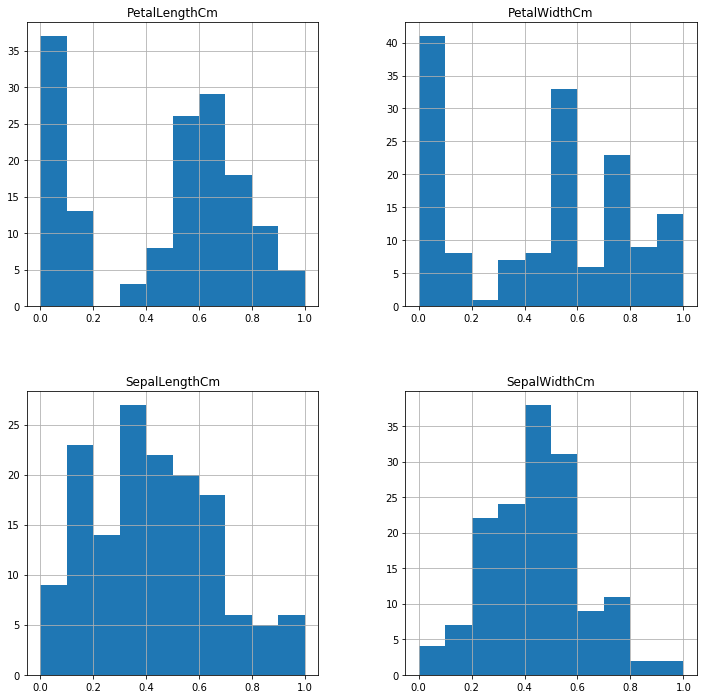

In [31]:
# Histogram to visualize data
df_visual_hist = x.hist(figsize = (12,12))

## K-Means

The elbow point in the graph occurs at 3 clusters. Elbow point determines the point after which the decrease in the measure (inertia) does not increase the model performance significantly.


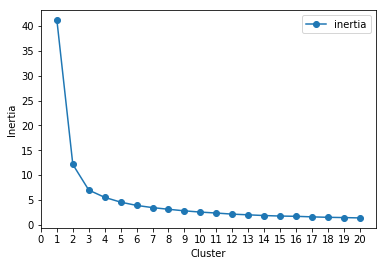

In [87]:
# K-Means with no. of clusters ranging from 1 to 20
# calculating inertia to find optimum number of clusters
# inertia is th sum of squared distance from centroid for a cluster

km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(x)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))
    
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

print('The elbow point in the graph occurs at 3 clusters. Elbow point determines the point after which the decrease in the measure (inertia) does not increase the model performance significantly.')

In [36]:
km = KMeans(n_clusters=3, random_state=42)
km = km.fit(x)
df['kmeans'] = km.predict(x)

In [37]:
(df[['Species','kmeans']]
 .groupby(['Species','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'count'}))

count
Species         kmeans       
Iris-setosa     0          50
Iris-versicolor 1           3
                2          47
Iris-virginica  1          36
                2          14

In [85]:
df.kmeans.value_counts()

2    61
0    50
1    39
Name: kmeans, dtype: int64

Text(0.5,1,'Visualization of K-Means results with centroids')

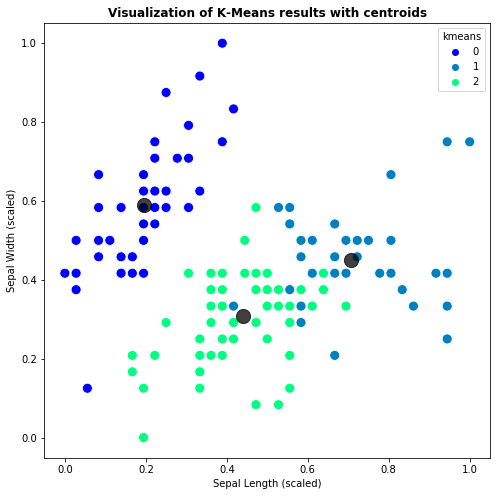

In [77]:
# Visualising the clusters for first two features of x

plt.figure(figsize=(8,8))

col_names = df.columns
sns.scatterplot(data=x, x=col_names[0], y=col_names[1],  hue=df.kmeans, legend='brief', s = 100, palette = 'winter')

# plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=df['kmeans'], s=100, cmap='winter')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
# plt.legend()
# plt.legend(['Iris-setosa','Iris-virginica','Iris-versicolour','Centroids'])
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Visualization of K-Means results with centroids',fontweight ='bold')

## Conclusion

The optimal number of clusters was found to be 3.

Since this is an unsupervised learning problem, it would be incorrect to check the accuracy of the clustering results by comparing with the label that we already have. 